In [12]:
import os

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import cmcrameri.cm as cmc

In [13]:
def myround(x, base=5):
    return base * round(x/base)

In [14]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [15]:
min(combined.scardec_magnitude)

5.525

In [16]:
max(combined.scardec_magnitude)

9.026

In [17]:
def get_stf(scardec_name, wanted_type = 'fctopt'):
    db = combined[combined['scardec_name']==scardec_name]

    time = []
    momentrate = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time.append(float(split[0]))
        momentrate.append(float(split[1]))

    momentrate = np.array(momentrate)
    return momentrate, time, db

In [18]:
def get_mag(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    mag = db['scardec_magnitude'].values[0]
    return mag

def get_date(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    year = db['year'].values[0]
    month = db['month'].values[0]
    day = db['day'].values[0]
    return year, month, day

In [19]:
# looks for time value of root
def f3(end_time, total_moment, time_opt, momentrate_opt, start, points_before_zero, proportion = 0.1):
    dx = time_opt[1]-time_opt[0]
    end_window = (end_time/dx)+points_before_zero
    end = int(np.floor(end_window))
    short = scipy.integrate.simpson(momentrate_opt[start:end], dx = dx)
    return short-(total_moment*proportion)

In [20]:
def bootstrap(data, n=1000, proportion = 1):
    """Bootstrap resampling of data.

    Args:
        data: 1D array of data to be resampled.
        n: number of resamples to take.

    Returns:
        resampled data.
    """

    rng = np.random.default_rng()

    resampled_data = rng.choice(data, (n, int(len(data)*proportion)), replace = True)

    return resampled_data

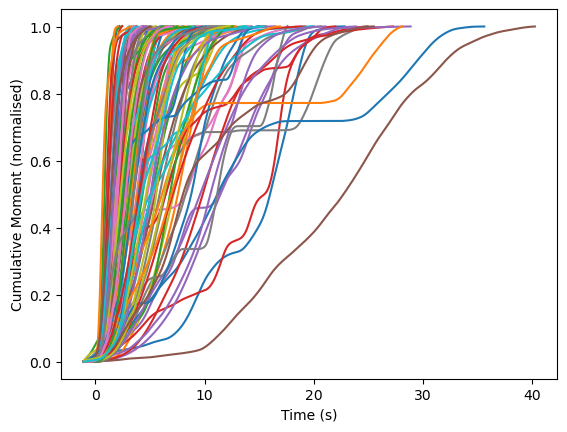

In [21]:
for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec')[0:100]:
    #print(scardec_name)
    momentrate_opt, time_opt, db = get_stf(scardec_name, wanted_type = 'fctmoy')

    not_zero = np.where(momentrate_opt > 0)[0]

    dx = time_opt[1]-time_opt[0]

    start = min(not_zero)
    end = max(not_zero)
    points_before_zero = abs(min(time_opt)/dx)

    duration = time_opt[end] - time_opt[start]

    start_time = time_opt[start]
    end_time = time_opt[end]

    total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])

    cumulative_moment = np.cumsum(momentrate_opt[start:end])*dx

    plt.plot(time_opt[start:end], cumulative_moment/total_moment)

    plt.ylabel('Cumulative Moment (normalised)')
    plt.xlabel('Time (s)')


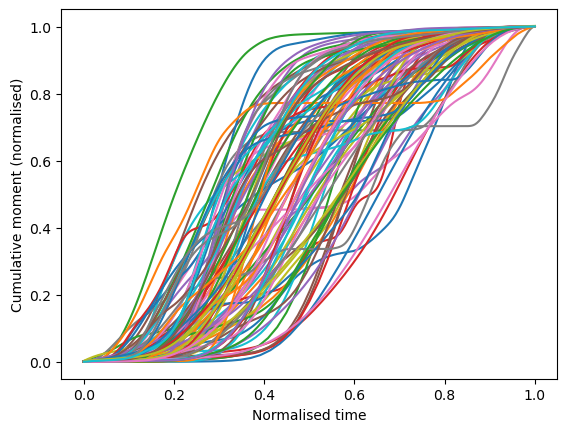

In [22]:
for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec')[0:100]:
    #print(scardec_name)
    momentrate_opt, time_opt, db = get_stf(scardec_name, wanted_type = 'fctmoy')

    not_zero = np.where(momentrate_opt > 0)[0]

    dx = time_opt[1]-time_opt[0]

    start = min(not_zero)
    end = max(not_zero)
    points_before_zero = abs(min(time_opt)/dx)

    duration = time_opt[end] - time_opt[start]

    start_time = time_opt[start]
    end_time = time_opt[end]

    total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])

    cumulative_moment = np.cumsum(momentrate_opt[start:end])*dx

    plt.plot(np.linspace(0, 1, len(cumulative_moment)), cumulative_moment/total_moment)
    plt.ylabel('Cumulative moment (normalised)')
    plt.xlabel('Normalised time')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/cumulative_moment/first_100.png')

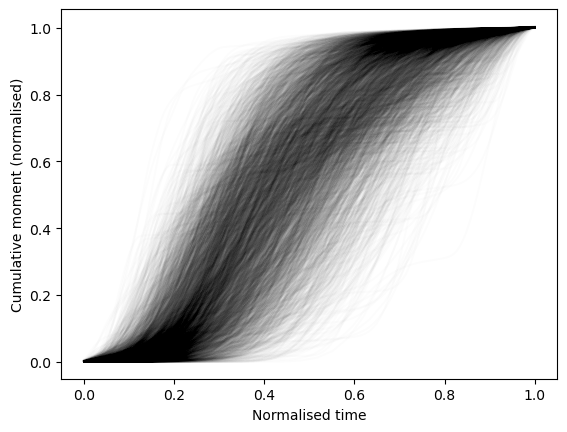

In [23]:
for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
    #print(scardec_name)
    momentrate_opt, time_opt, db = get_stf(scardec_name, wanted_type = 'fctmoy')

    not_zero = np.where(momentrate_opt > 0)[0]

    dx = time_opt[1]-time_opt[0]

    start = min(not_zero)
    end = max(not_zero)
    points_before_zero = abs(min(time_opt)/dx)

    duration = time_opt[end] - time_opt[start]

    start_time = time_opt[start]
    end_time = time_opt[end]

    total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])

    cumulative_moment = np.cumsum(momentrate_opt[start:end])*dx

    plt.plot(np.linspace(0, 1, len(cumulative_moment)), cumulative_moment/total_moment, color = 'k', alpha = 0.01)
    plt.ylabel('Cumulative moment (normalised)')
    plt.xlabel('Normalised time')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/cumulative_moment/all.png')

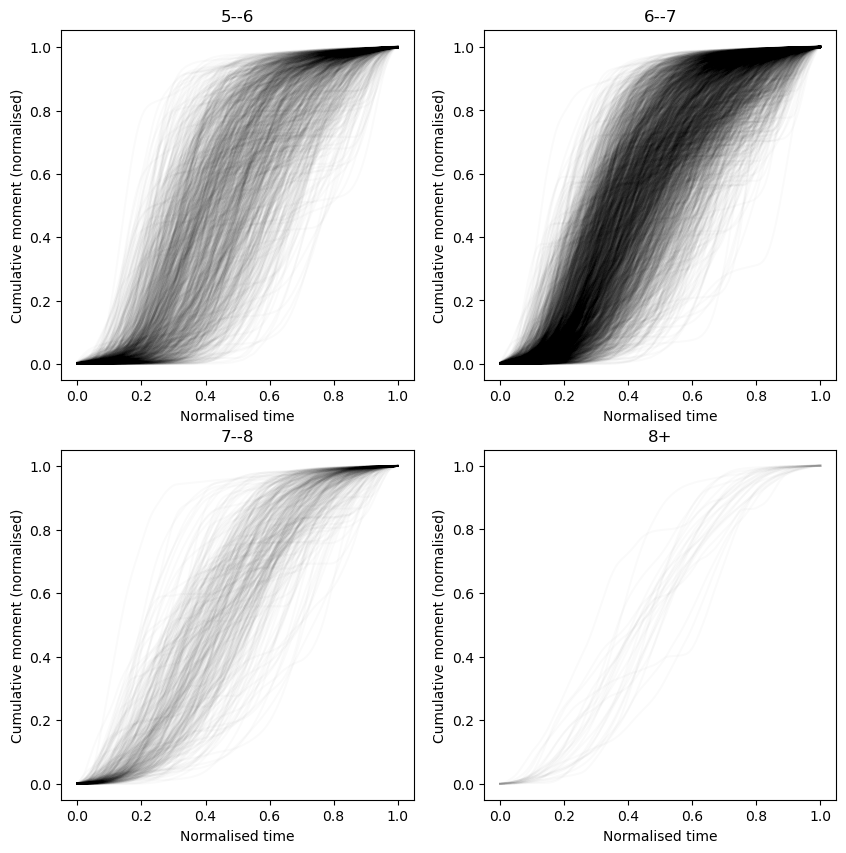

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
    #print(scardec_name)
    momentrate_opt, time_opt, db = get_stf(scardec_name, wanted_type = 'fctmoy')

    not_zero = np.where(momentrate_opt > 0)[0]

    dx = time_opt[1]-time_opt[0]

    start = min(not_zero)
    end = max(not_zero)
    points_before_zero = abs(min(time_opt)/dx)

    duration = time_opt[end] - time_opt[start]

    start_time = time_opt[start]
    end_time = time_opt[end]

    total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])

    cumulative_moment = np.cumsum(momentrate_opt[start:end])*dx

    mag = get_mag(scardec_name)

    i = int((mag-5)/2)
    j = int((mag-5)%2)

    if mag >= 9:
        i = 1
        j = 1

    axs[i][j].plot(np.linspace(0, 1, len(cumulative_moment)), cumulative_moment/total_moment, color = 'k', alpha = 0.02)


axs[0][0].set_title('5--6')
axs[0][1].set_title('6--7')
axs[1][0].set_title('7--8')
axs[1][1].set_title('8+')

for ax in axs:
    for a in ax:
        a.set_ylabel('Cumulative moment (normalised)')
        a.set_xlabel('Normalised time')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/cumulative_moment/panels_magnitude.png')

In [25]:
i

1

In [26]:
j

0

In [27]:
mag

7.094